<a href="https://colab.research.google.com/github/DhanaLakshmi2000/DhanaLakshmi2000/blob/master/Copy_of_Exploratory_data_analysis_of_car_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. importing libraries which are required for EDA

In [120]:
import pandas as pd
import numpy as np
import seaborn as sns              #visualization
import matplotlib.pyplot as plt    #visualization
%matplotlib inline

**1.1 Loading the data into the dataframe**

In [121]:
dataframe=pd.read_csv('data.csv')

In [122]:
#displaying the top 5 rows
dataframe.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [123]:
#displaying the last 5 rows
dataframe.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


**1.2 cheking the datatypes and basic summary of the stats**
 
we need to check for the datatypes because sometimes the datatype of MSRP or the price of the car would be stored as a string.If in that case we have to convert that string to an integer data only then we can plot the data via a graph.here in this case,the data is already in integer format

In [124]:
#cheking datatypes
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [125]:
#finding the some basics of summary stats
dataframe.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


**1.3 checking for the null values and the shape**

Here we will check whether there are any null values in the data so that we can impute them or remove them 

In [126]:
#finding the number of null values in the specified csv file
dataframe.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [127]:
#finding the number of rows and columns of a dataframe in a tuple format
dataframe.shape

(11914, 16)

# 2.Dropping irrelavent columns
 
We need to do this step because in EDA sometimes there would be column that we never use and in such cases dropping is useful.In this case,the columns such as Engine Fuel Type and Number of doors maynot be very relevant.

In [128]:
#dropping irrelavent columns
dataframe = dataframe.drop(['Market Category','Engine Fuel Type','Number of Doors'],axis=1)
#displaying top 5 rows after dropping the columns
dataframe.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


#3. Renaming the columns

sometimes,column names will be confusing or not readable,so its a good practice to rename column names as it improves the readability of the dataset 

In [129]:
#renaming the columns
dataframe.rename(columns={"Engine HP": "HP","Engine Cylinders": "Cylinders","Transmission Type":"Transmission","Driven_Wheels":"Drive mode","highway MPG":"MPG-H","city mpg":"MPG-C","MSRP":"price"},inplace = True)
#Displaying the first 5 rows after renaming columns 
dataframe.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


#4.plotting graphs,checking for the outliers and removing them

An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Often outliers can be seen with visualizations using a box plot. Shown below are the box plot of MSRP, Cylinders, Horsepower and EngineSize. Herein all the plots, you can find some points are outside the box they are none other than outliers. To know more about handling outliers, here is a resource towards data science.



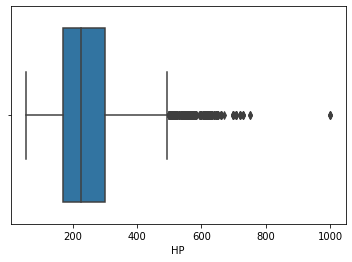

In [130]:
#boxplot graph for HP column
sns.boxplot(x=dataframe['HP'])

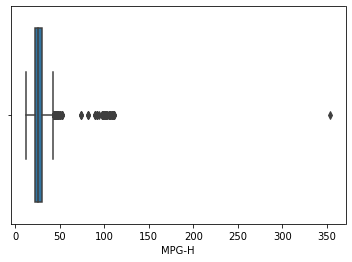

In [131]:
#boxplot graph for MPG-H
sns.boxplot(x=dataframe['MPG-H'])

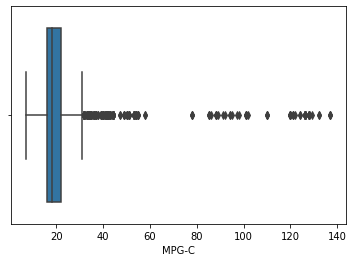

In [132]:
#boxplot graph for MPG-C column
sns.boxplot(x=dataframe['MPG-C'])

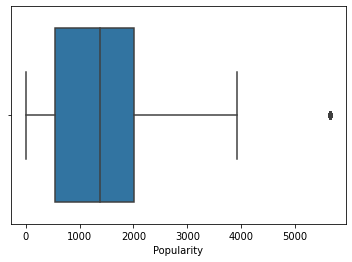

In [133]:
#boxplot graph for for Popularity column
sns.boxplot(x=dataframe['Popularity'])

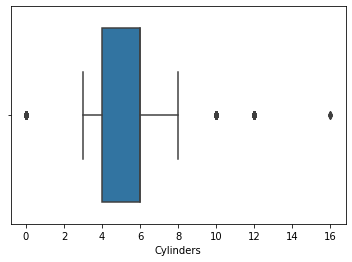

In [134]:
#boxplot graph for Cylinders column
sns.boxplot(x=dataframe['Cylinders'])

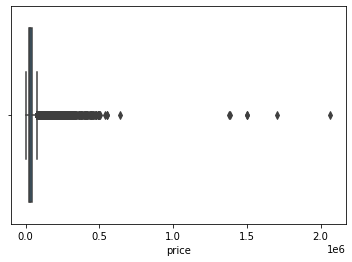

In [135]:
#boxplot graph for price column
sns.boxplot(x=dataframe['price'])

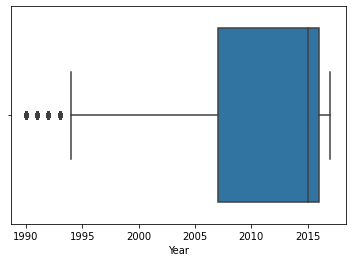

In [136]:
#boxplot graph for Year column
sns.boxplot(x=dataframe['Year'])

In [137]:
#checking for outliers 
Q1=dataframe.quantile(0.25)
Q3=dataframe.quantile(0.75)
IQR=Q3-Q1
IQR

Year              9.00
HP              130.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
price         21231.25
dtype: float64

In [138]:
#removing the outlires
dataframe=dataframe[~((dataframe<(Q1-1.5*IQR))|(dataframe>(Q3+1.5*IQR))).any(axis=1)]
dataframe.shape

(9084, 13)

#5.checking for the duplicates,null values,missing values and removing them 
 
This data contains more than 10,000 lines and it may contain some duplicate data,so here we remove all the duplicated values from the dataset.
 
And there will be some null, missing values in the dataset as it is very large dataset .so we will replace them with the median values or we can remove them as well but here we are going to fill the missing values with the median values so that our other data will not be effected

In [140]:
#finding the duplicates in the given file
duplicateDFROW_dataframe = dataframe[dataframe.duplicated(keep='last')]
print("number of duplicate rows:",duplicateDFROW_dataframe.shape)

number of duplicate rows: (529, 13)


In [141]:
#removing duplicated values
dataframe.drop_duplicates(subset=None,keep='first',inplace=True)

In [142]:
#finding number of rows and columns after removing duplicated values
dataframe.shape

(8555, 13)

In [143]:
#as checking for the null values
print(dataframe.isnull().sum())

Make              0
Model             0
Year              0
HP               11
Cylinders        19
Transmission      0
Drive mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
price             0
dtype: int64


In [144]:
 # now we will just try to fill the NaN values
dataframe.fillna(dataframe.median(),inplace=True)

In [145]:
#checking whether the null are available or not
print(dataframe.isnull().sum())

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
price            0
dtype: int64


In [146]:
dataframe.shape

(8555, 13)

#6.1 most represented cars in the dataset 


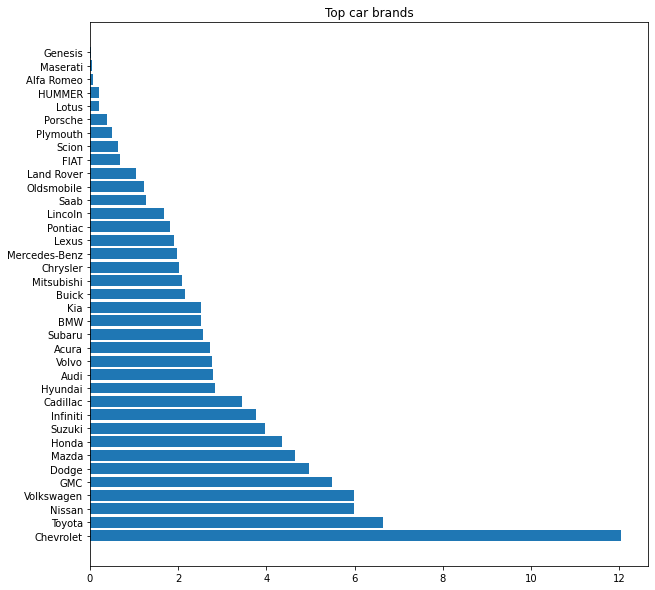

In [147]:
#percentage of car per brand
counts =dataframe['Make'].value_counts()*100/sum(dataframe['Make'].value_counts())
 
#car brands
popular_labels = counts.index[:]
 
#plotting the graph
plt.figure(figsize=(10,10))
plt.barh(popular_labels,width=counts[:])
plt.title('Top car brands')
plt.show()

from the above graph we can say that most represented car brand from the dataset is chevrolet 

#6.2 average price among the top car brands

Now here,we will find the average price among the top car brands by taking the top 10 car brands as a sample

In [148]:
prices=dataframe[['Make','price']].loc[(dataframe['Make']=='chevrolet')|
                   (dataframe['Make']=='Ford')|
                   (dataframe['Make']=='volkswagen')|
                   (dataframe['Make']=='Toyata')|
                   (dataframe['Make']=='Dodge')|
                   (dataframe['Make']=='Nissan')|
                   (dataframe['Make']=='GMC')|
                   (dataframe['Make']=='Honda')|
                   (dataframe['Make']=='Mazda')|
                   (dataframe['Make']=='Suzuki')].groupby('Make').mean()
print(prices)

               price
Make                
Dodge   26076.722353
GMC     33261.400853
Honda   27381.364611
Mazda   20830.670025
Nissan  28352.543860
Suzuki  18168.241888


#7.plotting correlation matrix

A correlation matrix is an easy way to represnt the correlation coefficients between variables.Each cell represents the correlation between two variables

In [149]:
dataframe.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,price
Year,1.000000,0.324008,-0.107934,0.373784,0.335924,0.200211,0.595736
HP,0.324008,1.000000,0.733180,-0.453253,-0.553998,0.093357,0.742351
Cylinders,-0.107934,0.733180,1.000000,-0.692201,-0.746940,0.011448,0.385476
MPG-H,0.373784,-0.453253,-0.692201,1.000000,0.937131,0.094207,-0.118474
MPG-C,0.335924,-0.553998,-0.746940,0.937131,1.000000,0.082990,-0.194673
Popularity,0.200211,0.093357,0.011448,0.094207,0.082990,1.000000,0.111515
price,0.595736,0.742351,0.385476,-0.118474,-0.194673,0.111515,1.000000


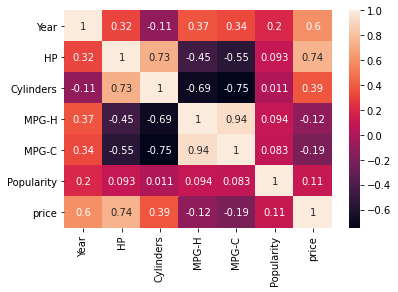

In [150]:
#plotting heatmap for correlating matrix
corrMatrix = dataframe.corr()
sns.heatmap(corrMatrix,annot=True)

#from the above heatmap we can conclude

1. price is positively dependent(directly dependent) on HP(horse power) and Year.
that means if HP increases the cost of the price will also be increased  

2. Features of HP and cylinders are positively dependent on each other
It means if HP increases the number of cylinders will also be increased

3. MPG-H and MPG-C have strong negative correlation with cylinders
It means that if MPG-C and MPG-H increases then number of cylinders will be decreased (they are inversly proporstional here)

#8 plotting graphs

graphical method is an easy way to representing the dataset and analye it  

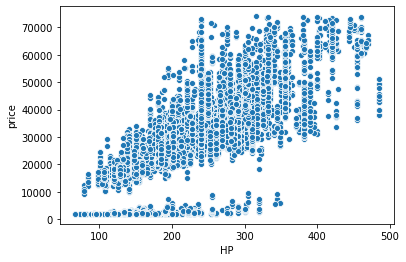

In [151]:
#checking how price will be effected by the HP 
sns.scatterplot(dataframe['HP'],dataframe['price'])

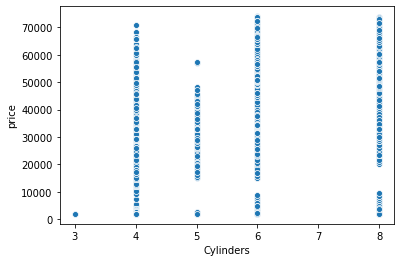

In [152]:
sns.scatterplot(dataframe['Cylinders'],dataframe['price'])

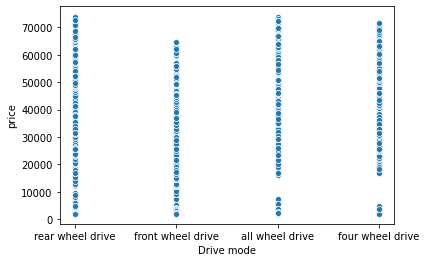

In [153]:
sns.scatterplot(dataframe['Drive mode'],dataframe['price'])

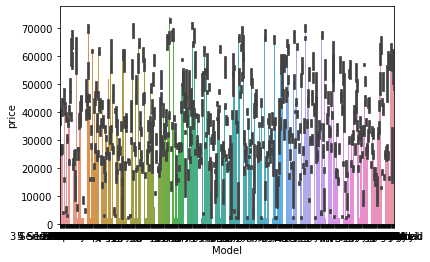

In [154]:
sns.barplot(dataframe['Model'],dataframe['price'])

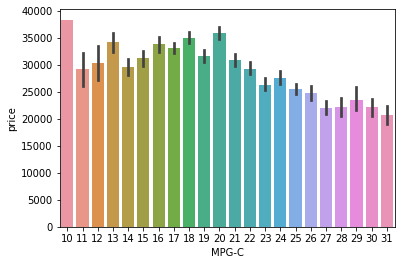

In [155]:
sns.barplot(dataframe['MPG-C'],dataframe['price'])

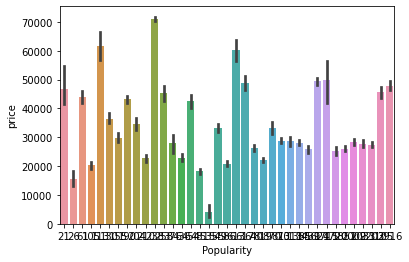

In [156]:
sns.barplot(dataframe['Popularity'],dataframe['price'])

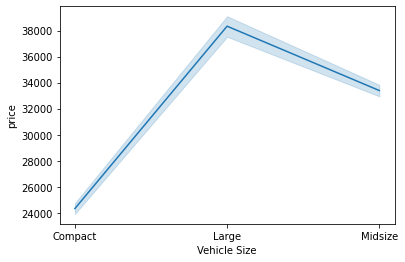

In [157]:
sns.lineplot(dataframe['Vehicle Size'],dataframe['price'])

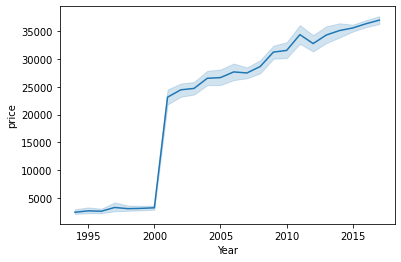

In [158]:
sns.lineplot(dataframe ['Year'], dataframe ['price'])

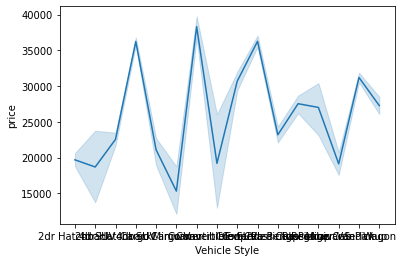

In [159]:
sns.lineplot(dataframe['Vehicle Style'],dataframe['price'])

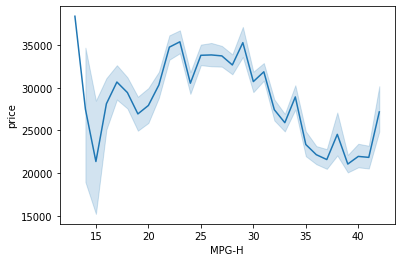

In [160]:
sns.lineplot(dataframe['MPG-H'],dataframe['price'])

**From the all above graphs we can conclude that**

1. HP(horse power) shows directly proportional effect on the price. 
    i.e. if HP increases then price will also increase.
2. MPG-C mostly shows inversly proportional effect on the price. 
    i.e. as MPG-C increases price decreases and vice versa.
3. Vechile size shows the directly proportional relation on the price.
    i.e. if Vechile size increases then price will also increase.
4. As the year increases the price of the car will also increases

#9.1 Splitting the dataset

Dataset spliting emerges as a necessity to eliminate bias to training data in Machine Algorithms.Here,we first perform oneHotEncoding before splitting the dataset so that the whole data will be converted to integer or float datatype from the object so that it will be easy to split and build the ML algorithms.

In [161]:
k=dataframe.select_dtypes(exclude=[np.number]).columns
k

Index(['Make', 'Model', 'Transmission', 'Drive mode', 'Vehicle Size',
       'Vehicle Style'],
      dtype='object')

In [162]:
#importing the libraries required for oneHotEncoding
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
#creating the object instance
label_enc = LabelEncoder()
for i in k:
  dataframe[i] = label_enc.fit_transform(dataframe[i])
print('Label encoded data')
dataframe.info()

Label encoded data
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8555 entries, 0 to 11913
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           8555 non-null   int64  
 1   Model          8555 non-null   int64  
 2   Year           8555 non-null   int64  
 3   HP             8555 non-null   float64
 4   Cylinders      8555 non-null   float64
 5   Transmission   8555 non-null   int64  
 6   Drive mode     8555 non-null   int64  
 7   Vehicle Size   8555 non-null   int64  
 8   Vehicle Style  8555 non-null   int64  
 9   MPG-H          8555 non-null   int64  
 10  MPG-C          8555 non-null   int64  
 11  Popularity     8555 non-null   int64  
 12  price          8555 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 1.2 MB


In [163]:
#assigning feature and target variables to X and Y
X = dataframe[['Popularity','Year','HP','Cylinders','MPG-H','MPG-C','Make','Model','Transmission','Drive mode','Vehicle Size','Vehicle Style']].values
Y=dataframe['price'].values

In [164]:
# importing train_test_split from sklearn library
from sklearn.model_selection import train_test_split
# spliting the dataset into the training set and test set
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(6844, 12) (6844,)
(1711, 12) (1711,)


#9.2 Creating a ML model

This Machine learning algorithms helps us in building a mathematical model based on sample data,known as "training data",which helps in making predictions without being explicitly programmed to do so.

#linear regression

In [165]:
#importing linear regression class from sicit learn
from sklearn.linear_model import LinearRegression

#creating linear regression model using imported class
regressor= LinearRegression()

#train the model by applying fit function
regressor.fit(X_train,Y_train)
#predicting the output by applying the predict function on input
Y_pred=regressor.predict(X_test)
Y_pred

array([30466.43129087, 13912.27871356, 36717.40400786, ...,
       23038.12055603, 13237.95676995, 42459.14685578])

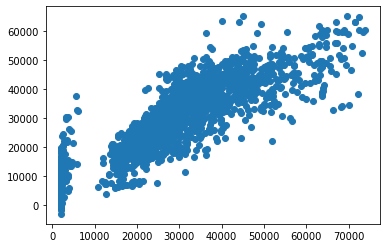

In [166]:
#visualising the result using scatter plot
plt.scatter(Y_test,Y_pred)

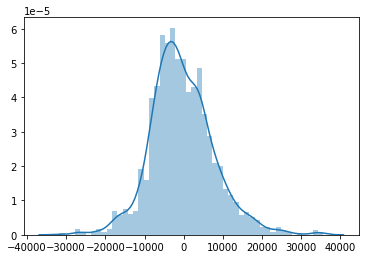

In [167]:
sns.distplot((Y_test-Y_pred),bins=50)

In [168]:
#importing the required libraries.
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import math
#printing the values of r2,MAE,MSE,RMSE
print('R-squared : ', r2_score(Y_test,Y_pred))
print('MAE :' , mean_absolute_error(Y_test,Y_pred))
print('MSE : ',mean_squared_error(Y_test,Y_pred))
print('RMSE :',math.sqrt(mean_squared_error(Y_test,Y_pred)))

R-squared :  0.6998899442371787
MAE : 6207.874426427791
MSE :  65384382.711702846
RMSE : 8086.061013355195


#10. plotting different models

**10.1 Decision trees**

In [169]:
#importing DecisionTreeRegressor from sicit learn
from sklearn.tree import DecisionTreeRegressor

In [170]:
#fit in the model
model=DecisionTreeRegressor()
model.fit(X_train,Y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [171]:
#making the prediction
Y_pred=model.predict(X_test)
Y_pred

array([32395. , 15589. , 31317.5, ..., 35585. , 17710. , 40460. ])

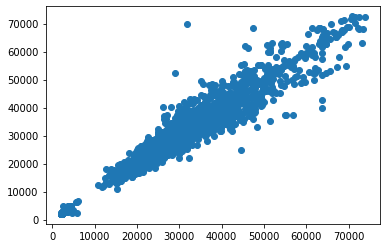

In [172]:
#visualising the result using scatter plot
plt.scatter(Y_test,Y_pred)

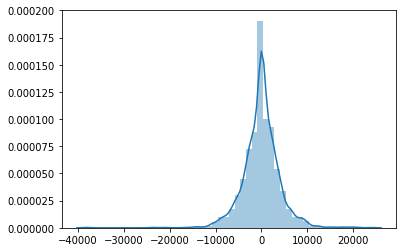

In [173]:
sns.distplot((Y_test-Y_pred),bins=50)

In [174]:
#importing the required libraries.
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import math
#printing the values of r2,MAE,MSE,RMSE
print('R-squared : ', r2_score(Y_test,Y_pred))
print('MAE :', mean_absolute_error(Y_test,Y_pred))
print('MSE : ',mean_squared_error(Y_test,Y_pred))
print('RMSE:',math.sqrt(mean_squared_error(Y_test,Y_pred)))

R-squared :  0.9246093218536389
MAE : 2747.6438365031295
MSE :  16425217.543234196
RMSE: 4052.8036645307893


**10.2 Random Forest**

In [175]:
#importing RandomForestregressor from sicit learn
from sklearn.ensemble import RandomForestRegressor
#fit in the model
reg = RandomForestRegressor(n_estimators=300,random_state=0)
reg.fit(X_train,Y_train)
#predicting the result by applying predict function on input
Y_pred = reg.predict(X_test)
Y_pred

array([32970.67285714, 15593.31674603, 31270.71894231, ...,
       35017.39939214, 16838.28775794, 40449.71593254])

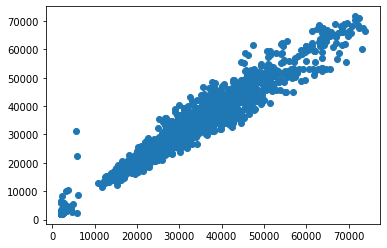

In [176]:
#visualising the prediction using scatter plot
plt.scatter(Y_test,Y_pred)

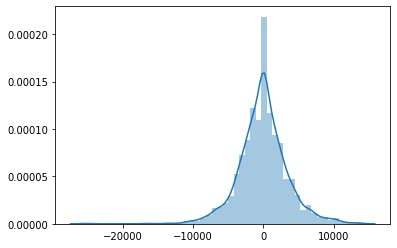

In [177]:
sns.distplot((Y_test-Y_pred),bins=50)

In [178]:
#importing the required libraries.
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import math
#printing the values of r2,MAE,MSE,RMSE
print('R-squared : ', r2_score(Y_test,Y_pred))
print('MAE :' , mean_absolute_error(Y_test,Y_pred))
print('MSE : ',mean_squared_error(Y_test,Y_pred))
print('RMSE :',math.sqrt(mean_squared_error(Y_test,Y_pred)))

R-squared :  0.9447062827613182
MAE : 2495.937294420766
MSE :  12046732.523830798
RMSE : 3470.8403195524274


**10.3 Naive Bayes** 

In [181]:
#importing GaussianNB from sicit learn
from sklearn.naive_bayes import GaussianNB
#fit in model
classifier = GaussianNB()
classifier.fit(X_train,Y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [182]:
#making the prediction
Y_pred = classifier.predict(X_test)
Y_pred

array([28200, 15589, 29535, ..., 47975, 17710, 37495])

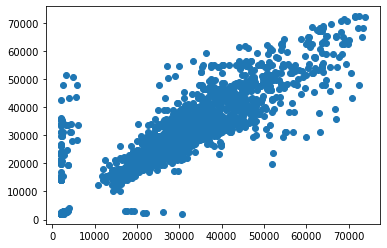

In [183]:
#visualising the result using scatter plot
plt.scatter(Y_test,Y_pred)

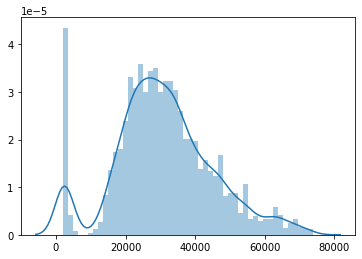

In [184]:
sns.distplot((Y_test,Y_pred),bins=50)

In [185]:
#importing accuracy_score from sicit learn
from sklearn.metrics import accuracy_score
#finding the accuracy
accuracy_score(Y_test,Y_pred)

0.015195791934541203

In [186]:
#importing the required libraries.
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import math
#printing the values of r2,MAE,MSE,RMSE
print('R-squared : ', r2_score(Y_test,Y_pred))
print('MAE :' , mean_absolute_error(Y_test,Y_pred))
print('MSE : ',mean_squared_error(Y_test,Y_pred))
print('RMSE :',math.sqrt(mean_squared_error(Y_test,Y_pred)))

R-squared :  0.706656984138528
MAE : 5077.43658679135
MSE :  63910061.14786675
RMSE : 7994.376845500014


**10.4 support vector regression**

In [187]:
##import the SVR model from scikit learn
from sklearn.svm import SVR
#fit in a model
regressor=SVR(kernel='rbf')
regressor.fit(X_train,Y_train)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [188]:
#making a prediction
Y_pred=regressor.predict(X_test)
Y_pred

array([29765.23375399, 29748.54069859, 29768.37864294, ...,
       29804.81556421, 29738.13292996, 29807.49118041])

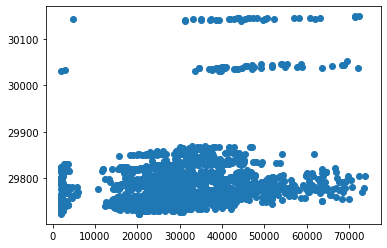

In [189]:
#scatter plot graph
plt.scatter(Y_test,Y_pred)

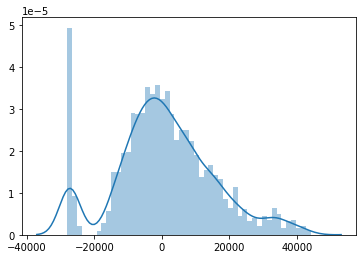

In [190]:
sns.distplot((Y_test-Y_pred),bins=50)

In [191]:
#importing the required libraries.
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import math
#printing the values of r2,MAE,MSE,RMSE
print('R-squared : ', r2_score(Y_test,Y_pred))
print('MAE :' , mean_absolute_error(Y_test,Y_pred))
print('MSE : ',mean_squared_error(Y_test,Y_pred))
print('RMSE :',math.sqrt(mean_squared_error(Y_test,Y_pred)))

R-squared :  -0.0016866509895046011
MAE : 11242.394332566055
MSE :  218235484.24269566
RMSE : 14772.795410574658


**10.5 KNN**

In [209]:
#import the KNN model from scikit learn
from sklearn.neighbors import KNeighborsClassifier

In [210]:
#init the model
#minkowski = distance formula and p=2 power 2 of distformula
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=3)


In [211]:
#fit the model
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=3,
                     weights='uniform')

In [212]:
#making the prediction
Y_pred=knn.predict(X_test)
Y_pred

array([32395, 15099, 29535, ..., 32215, 14435, 37495])

In [213]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[58,  0,  0, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [214]:
#importing accuracy_score from sicit learn
from sklearn.metrics import accuracy_score
#finding the accuracy
accuracy_score(Y_test,Y_pred)

0.05143191116306254

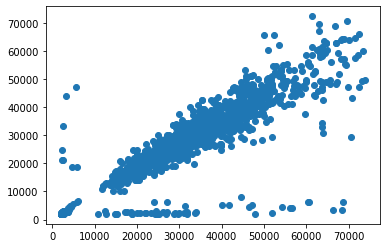

In [216]:
#visualising the result using scatter plot
plt.scatter(Y_test,Y_pred)

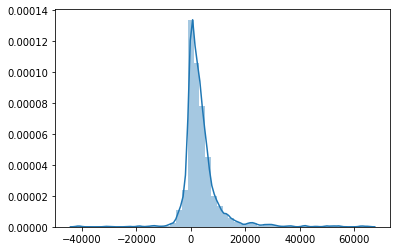

In [217]:
sns.distplot((Y_test-Y_pred),bins=50)

In [218]:
#importing the required libraries.
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import math
#printing the values of r2,MAE,MSE,RMSE
print('R-squared : ', r2_score(Y_test,Y_pred))
print('MAE :' , mean_absolute_error(Y_test,Y_pred))
print('MSE : ',mean_squared_error(Y_test,Y_pred))
print('RMSE :',math.sqrt(mean_squared_error(Y_test,Y_pred)))

R-squared :  0.7066943672987009
MAE : 4459.580362361192
MSE :  63901916.55289304
RMSE : 7993.867434032982


**10.6 polynomial regression**

In [219]:
#import the polynomialFeatures model from scikit learn
from sklearn.preprocessing import PolynomialFeatures
reg = PolynomialFeatures(degree = 2)
X_poly = reg.fit_transform(X_train)
reg.fit(X_poly, Y_train)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [224]:
#making the predictions
Y_pred=lin_reg.predict(reg.fit_transform(X_test))
Y_pred

array([31445.97960734, 20547.79827952, 31805.03286833, ...,
       31230.04699957, 16628.24046081, 42215.38108152])

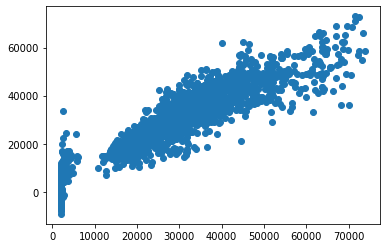

In [225]:
##visualising the result using scatter plot
plt.scatter(Y_test,Y_pred)

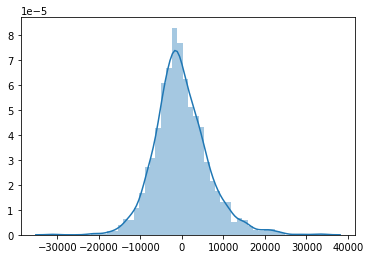

In [226]:
sns.distplot((Y_test-Y_pred),bins=50)

In [227]:
#importing the required libraries.
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import math
#printing the values of r2,MAE,MSE,RMSE
print('R-squared : ', r2_score(Y_test,Y_pred))
print('MAE :' , mean_absolute_error(Y_test,Y_pred))
print('MSE : ',mean_squared_error(Y_test,Y_pred))
print('RMSE :',math.sqrt(mean_squared_error(Y_test,Y_pred)))

R-squared :  0.804678887501864
MAE : 4908.637581840968
MSE :  42554223.445770346
RMSE : 6523.359828015801


# Insights

from the all above ML models we can conclude that

1.we have got large R-square value for RandomForest model.

2.we have got least RMSE value for RandomForest

3.we have got least MAE value for RandomForest

4.we have got least MSE value for RandomForest

from the above four conditions we can say that errors are less and R-squared values are high in RandomForest.

*RandomForest is the best suitable model for this EDA on cars dataset* 

Let us see the models one by one which suits the best and so on

1.RandomForest

2.Decision Trees

3.polynomial regression

4.KNN(K- nearest neighbours)

5.Naive Bayes

6.Linear regression

7.SVR